In [6]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as sp

In [2]:
graph = nx.read_edgelist('data/twitter_combined.txt', create_using=nx.DiGraph(), nodetype=int)

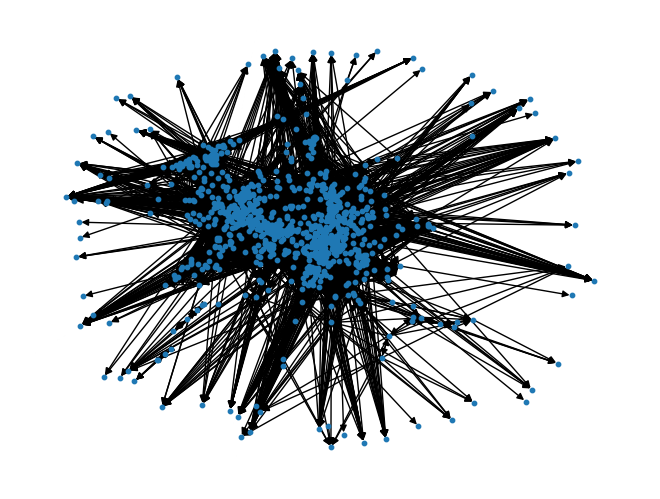

In [8]:
# draw small part of the graph
subgraph = graph.subgraph(list(graph.nodes())[:1000])
nx.draw(subgraph, with_labels=False, node_size=10)

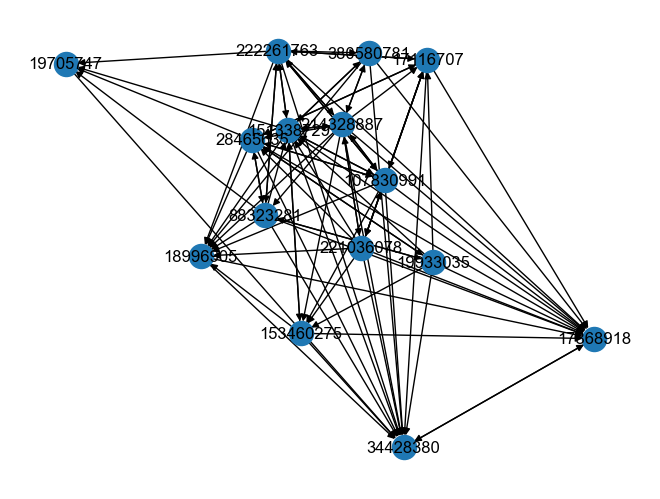

In [16]:
subgraph2 = graph.subgraph(list(graph.nodes())[:15])
nx.draw(subgraph2, with_labels=True)

In [17]:
density = nx.density(graph)
print("Network density:", density)

Network density: 0.0002674724217609368


In [18]:
# number of nodes
print("Number of nodes:", graph.number_of_nodes())

Number of nodes: 81306


In [19]:
# number of edges
print("Number of edges:", graph.number_of_edges())

Number of edges: 1768149


In [21]:
# average degree
degrees = [val for (node, val) in graph.degree()]
print("Average degree:", np.mean(degrees))

Average degree: 43.49369050254594


In [29]:
# path between two nodes
path = nx.shortest_path(graph, source=153460275, target=19705747)
print("Shortest path between 153460275 and 19705747:", path)

Shortest path between 153460275 and 19705747: [153460275, 151338729, 19705747]


In [31]:
# len of path
print("Length of path:", len(path)-1)

Length of path: 2


In [35]:
diameter = nx.diameter(graph)
print("Diameter:", diameter)

NetworkXError: Found infinite path length because the digraph is not strongly connected

Triadic closure is the property among three nodes A, B, and C (representing people, for instance), that if the connections A-B and A-C exist, there is a tendency for the new connection B-C to be formed.

In [66]:

triadic_closure = nx.transitivity(graph)
print("Triadic closure:", triadic_closure)

Triadic closure: 0.21751023226741378


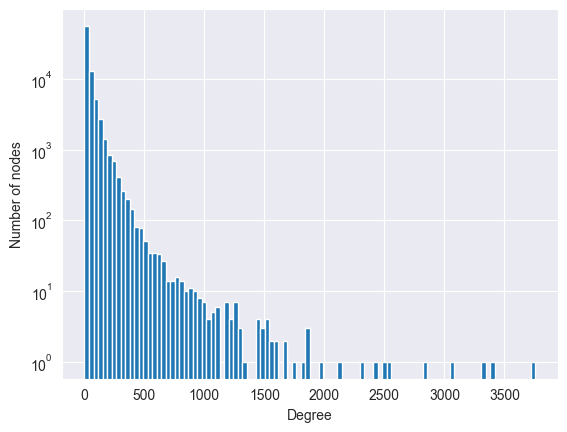

In [41]:
# degree distribution
degrees = [val for (node, val) in graph.degree()]
plt.hist(degrees, bins=100, log=True), plt.xlabel('Degree'), plt.ylabel('Number of nodes')
plt.show()

In [45]:
sorted_degree = sorted(graph.degree, key=lambda x: x[1], reverse=True)

In [47]:
print("Top 20 nodes by degree:")
for d in sorted_degree[:20]:
    print(d)

Top 20 nodes by degree:
(813286, 3758)
(115485051, 3384)
(40981798, 3335)
(3359851, 3063)
(43003845, 2840)
(22462180, 2535)
(34428380, 2513)
(59804598, 2406)
(7861312, 2298)
(15913, 2139)
(5442012, 1963)
(11348282, 1879)
(17093617, 1873)
(10671602, 1857)
(1183041, 1806)
(18776017, 1741)
(18927441, 1658)
(48485771, 1655)
(7860742, 1611)
(972651, 1605)


In [49]:
subgraph = graph.subgraph(list(graph.nodes())[:500])

betweenness centrality is a measure of centrality in a graph based on shortest paths. For every pair of vertices in a connected graph, there exists at least one shortest path between the vertices such that either the number of edges that the path passes through (for unweighted graphs) or the sum of the weights of the edges (for weighted graphs) is minimized. The betweenness centrality for each vertex is the number of these shortest paths that pass through the vertex.

In [72]:

betweenness = nx.betweenness_centrality(subgraph)
nx.set_node_attributes(subgraph, betweenness, 'betweenness')
sorted_betweenness = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)
print("Top 20 nodes by betweenness centrality:")
for b in sorted_betweenness[:20]:
    print(b)

Top 20 nodes by betweenness centrality:
(2367911, 0.23601200081683738)
(14677919, 0.2260693739048925)
(79797834, 0.165528638096672)
(191620115, 0.16142438218442912)
(100318079, 0.13836360769622844)
(25970331, 0.07383386955520849)
(7860742, 0.05242494946037487)
(102765423, 0.05161906294523535)
(14551276, 0.04578223842330518)
(23483324, 0.039831452639535775)
(19383317, 0.038680568283716917)
(111615736, 0.03749803605632692)
(40981798, 0.03698428422124765)
(43003845, 0.03603140920211562)
(29514951, 0.03402936297870048)
(31808762, 0.031932487702707395)
(30204310, 0.031496057711138475)
(16038438, 0.027177083767224164)
(82030021, 0.025190061387749242)
(14876672, 0.024404994518587932)


In a connected graph, closeness centrality (or closeness) of a node is a measure of centrality in a network, calculated as the reciprocal of the sum of the length of the shortest paths between the node and all other nodes in the graph. Thus, the more central a node is, the closer it is to all other nodes.

In [73]:

closeness = nx.closeness_centrality(subgraph)
nx.set_node_attributes(subgraph, closeness, 'closeness')
sorted_closeness = sorted(closeness.items(), key=lambda x: x[1], reverse=True)
print("Top 20 nodes by closeness centrality:")
for c in sorted_closeness[:20]:
    print(c)

Top 20 nodes by closeness centrality:
(2367911, 0.3028331795866866)
(40981798, 0.29655684425846507)
(43003845, 0.29521841878470023)
(18996905, 0.275335999720427)
(31331740, 0.2750052657868289)
(17868918, 0.2746753254559509)
(83943787, 0.2725498616280179)
(195475105, 0.2707769175251745)
(69592091, 0.27061688388597527)
(270449528, 0.27045703930010045)
(259842341, 0.2698195448055805)
(158419434, 0.2691850485214992)
(314316607, 0.2687111311825529)
(204140367, 0.26839611227143617)
(103598216, 0.26714338829350653)
(8163442, 0.2646726979971503)
(380580781, 0.2642145225245644)
(14925700, 0.2636060837853023)
(430313102, 0.26209717660851184)
(54228724, 0.2612000955704906)


eigenvector centrality (also called eigencentrality or prestige score[1]) is a measure of the influence of a node in a network. Relative scores are assigned to all nodes in the network based on the concept that connections to high-scoring nodes contribute more to the score of the node in question than equal connections to low-scoring nodes. A high eigenvector score means that a node is connected to many nodes who themselves have high scores.[2] [3]

In [74]:

eigenvector = nx.eigenvector_centrality(subgraph)
nx.set_node_attributes(subgraph, eigenvector, 'eigenvector')
sorted_eigenvector = sorted(eigenvector.items(), key=lambda x: x[1], reverse=True)
print("Top 20 nodes by eigenvector centrality:")
for e in sorted_eigenvector[:20]:
    print(e)

Top 20 nodes by eigenvector centrality:
(40981798, 0.1871237677170498)
(22462180, 0.1822268199691713)
(34428380, 0.1808882844583531)
(43003845, 0.18033572293785027)
(17868918, 0.15384763565341847)
(100318079, 0.14942985888266647)
(31331740, 0.14146999365852955)
(18996905, 0.14087514702835185)
(27633075, 0.13952742174705496)
(8088112, 0.1374853103224669)
(151338729, 0.13266025114912974)
(270449528, 0.1314967267070339)
(83943787, 0.13006270137576803)
(117674417, 0.12832961743178412)
(116036694, 0.1267948587387257)
(69592091, 0.12525067087555306)
(259842341, 0.12512030757039566)
(19493072, 0.12319059398072779)
(133055665, 0.12313617830914632)
(19358562, 0.12133021327804948)


The PageRank algorithm measures the importance of each node within the graph, based on the number incoming relationships and the importance of the corresponding source nodes. The underlying assumption roughly speaking is that a page is only as important as the pages that link to it.

In [75]:
# pagerank
pagerank = nx.pagerank(subgraph)
nx.set_node_attributes(subgraph, pagerank, 'pagerank')
sorted_pagerank = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)
print("Top 20 nodes by pagerank:")
for p in sorted_pagerank[:20]:
    print(p)

Top 20 nodes by pagerank:
(40981798, 0.018707491726905508)
(43003845, 0.01667443912733366)
(22462180, 0.014193012874784177)
(34428380, 0.014157706392261566)
(27633075, 0.010976506501440171)
(31331740, 0.010610220130863197)
(133055665, 0.010368697170347638)
(8088112, 0.010139098011490294)
(25970331, 0.009847994630460363)
(17868918, 0.009840841115043297)
(17759158, 0.009358255805550105)
(117674417, 0.008496623196326176)
(2367911, 0.008080003287815312)
(18996905, 0.007936742279328156)
(15460081, 0.007789908932375049)
(34507480, 0.007169003700615463)
(100318079, 0.007041316957746022)
(22440364, 0.0068799083916554656)
(21158690, 0.00672667673488954)
(22592948, 0.006428616109324906)


The assortativity coefficient is the Pearson correlation coefficient of degree between pairs of linked nodes.[2] Positive values of r indicate a correlation between nodes of similar degree, while negative values indicate relationships between nodes of different degree. In general, r lies between −1 and 1. When r = 1, the network is said to have perfect assortative mixing patterns, when r = 0 the network is non-assortative, while at r = −1 the network is completely disassortative.

In [58]:
# degree assortativity coefficient
r = nx.degree_assortativity_coefficient(subgraph)
print("Degree assortativity coefficient:", r)

Degree assortativity coefficient: 0.16463948005400347


a clustering coefficient is a measure of the degree to which nodes in a graph tend to cluster together. Evidence suggests that in most real-world networks, and in particular social networks, nodes tend to create tightly knit groups characterised by a relatively high density of ties; this likelihood tends to be greater than the average probability of a tie randomly established between two nodes

In [76]:
# clustering coefficient
clustering = nx.clustering(subgraph)
nx.set_node_attributes(subgraph, clustering, 'clustering')
sorted_clustering = sorted(clustering.items(), key=lambda x: x[1], reverse=True)
print("Top 20 nodes by clustering coefficient:")
for c in sorted_clustering[:20]:
    print(c)

Top 20 nodes by clustering coefficient:
(291476217, 1.0)
(345707398, 1.0)
(52073562, 1.0)
(22879382, 1.0)
(94918917, 0.9836065573770492)
(51477206, 0.8662790697674418)
(200884513, 0.8529411764705882)
(146556805, 0.8244274809160306)
(236575672, 0.8223684210526315)
(90779436, 0.7945205479452054)
(107511013, 0.7801932367149759)
(390811153, 0.7777777777777778)
(451493376, 0.75)
(324201646, 0.7452830188679245)
(282206645, 0.7433888344760039)
(230505689, 0.7419354838709677)
(63941463, 0.7391304347826086)
(437804658, 0.7360482654600302)
(244719623, 0.7093023255813954)
(37876253, 0.7043478260869566)


In [60]:
# average clustering coefficient
avg_clustering = nx.average_clustering(subgraph)
print("Average clustering coefficient:", avg_clustering)

Average clustering coefficient: 0.44919473624319334


In [67]:
from networkx.algorithms import community

In [77]:
communities = community.greedy_modularity_communities(subgraph)

In [78]:
print("Number of communities:", len(communities))

Number of communities: 4


In [79]:
print(communities)

[frozenset({222261763, 88097807, 37270037, 229425177, 69592091, 460282402, 17116707, 231238695, 461410856, 117901353, 6581292, 221036078, 8088112, 153460275, 276706356, 214328887, 18951737, 31246395, 29911100, 109740608, 206923844, 26929220, 153226312, 312284236, 197504076, 166214735, 220368467, 451250774, 250340951, 116036694, 157829215, 262802533, 72818790, 273149543, 279787626, 189875309, 437804658, 260769396, 276308596, 17868918, 172883064, 200559228, 196327549, 37699718, 103598216, 333161611, 430313102, 134940306, 236184723, 248883350, 170460311, 187773078, 394263193, 160237722, 94621855, 195475105, 123371682, 86221475, 18996905, 220068522, 375228586, 324201646, 113058991, 133055665, 131613362, 262340283, 124528830, 375317198, 107830991, 413275344, 19493072, 88323281, 145845459, 252770012, 529007327, 21548772, 107511013, 22462180, 151338729, 149538028, 213777144, 280935165, 15023872, 56860418, 276577539, 430268163, 203338499, 364971269, 46209291, 358775055, 258140947, 400689940, 6

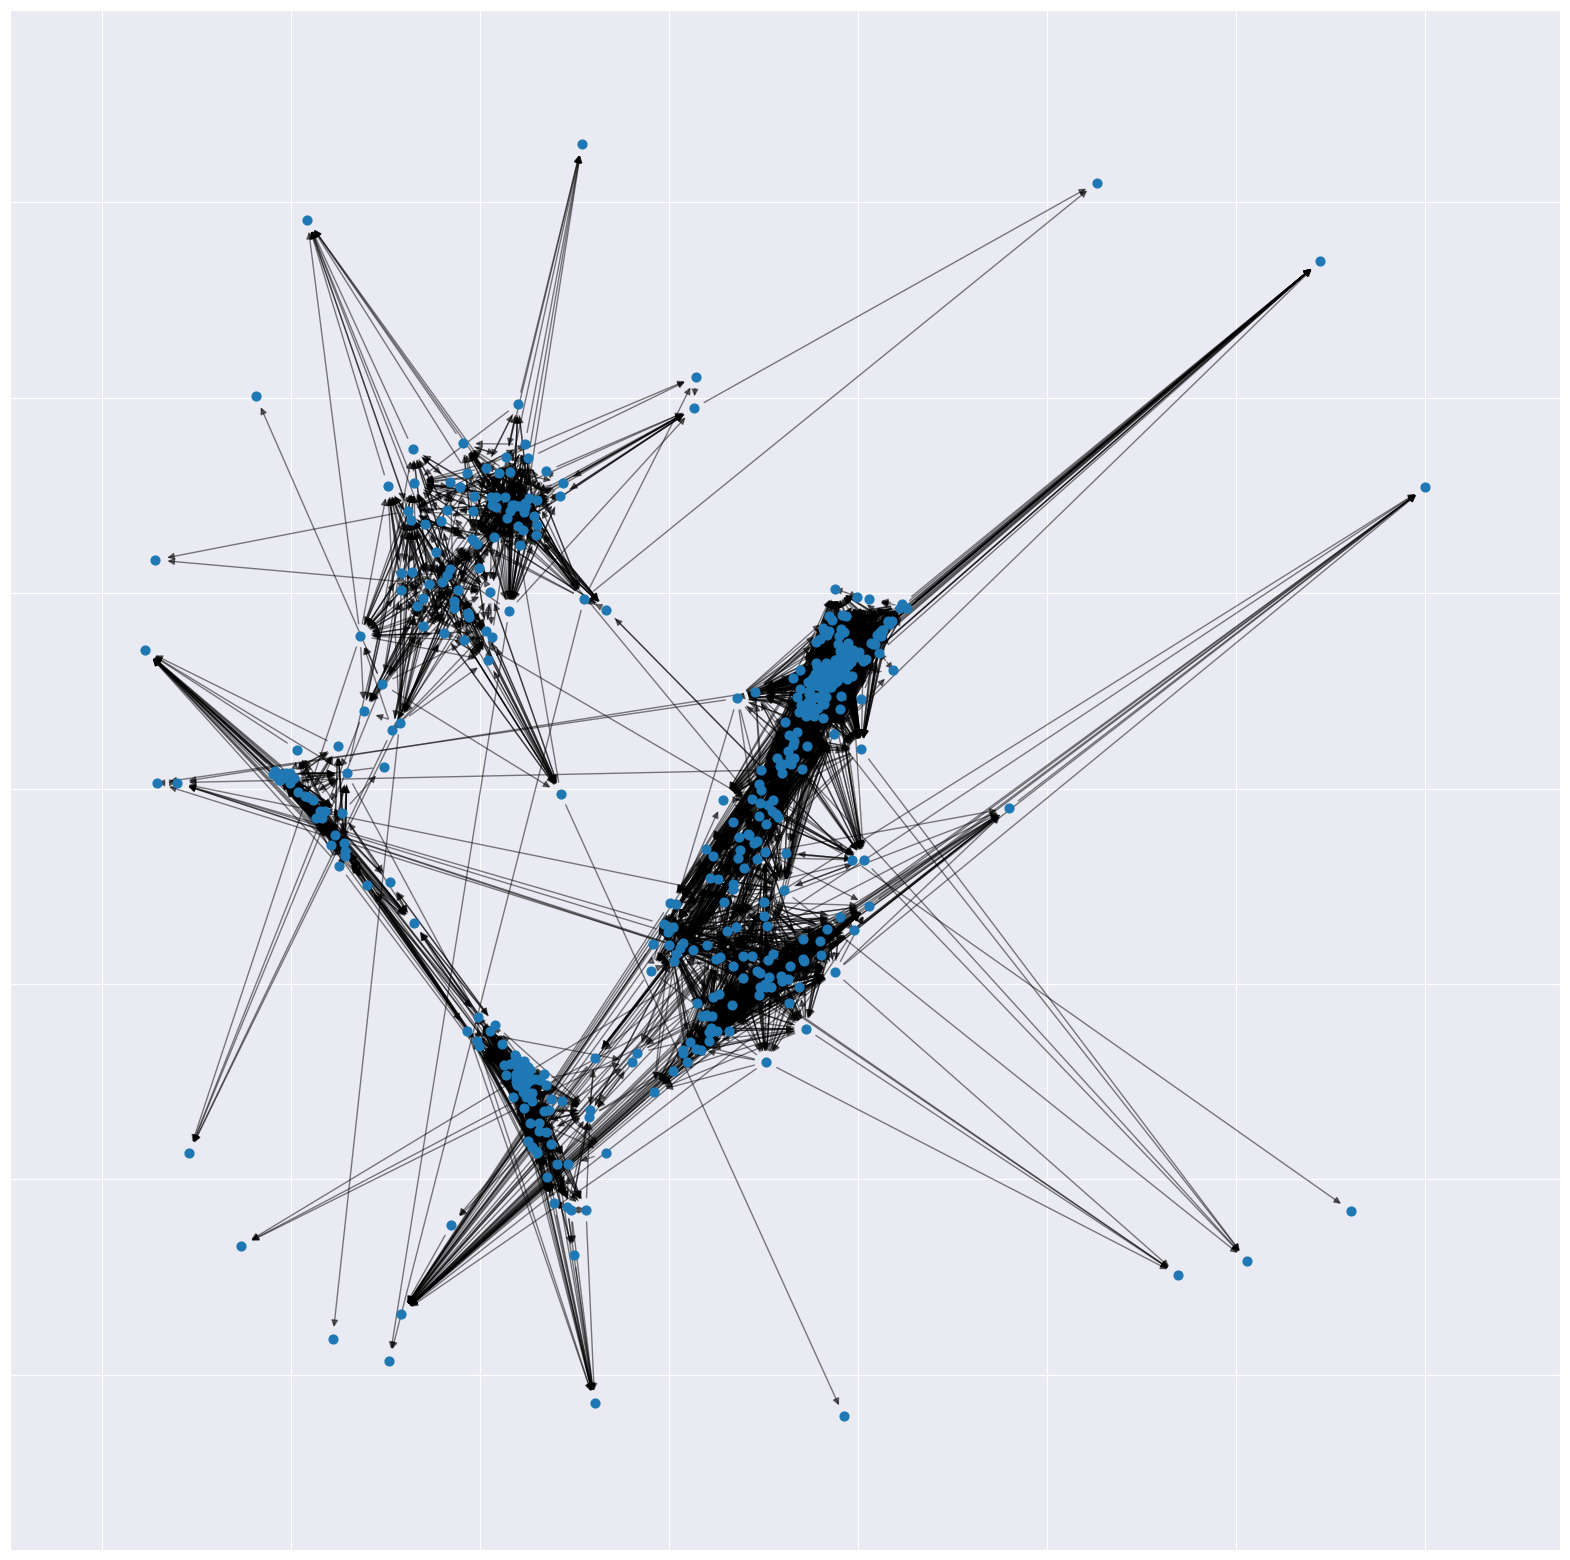

In [105]:
# plot the subgraph itself
plt.figure(figsize=(20, 20))
pos = nx.spring_layout(subgraph)
nx.draw_networkx_nodes(subgraph, pos, node_size=40)
nx.draw_networkx_edges(subgraph, pos, alpha=0.5)
plt.show()

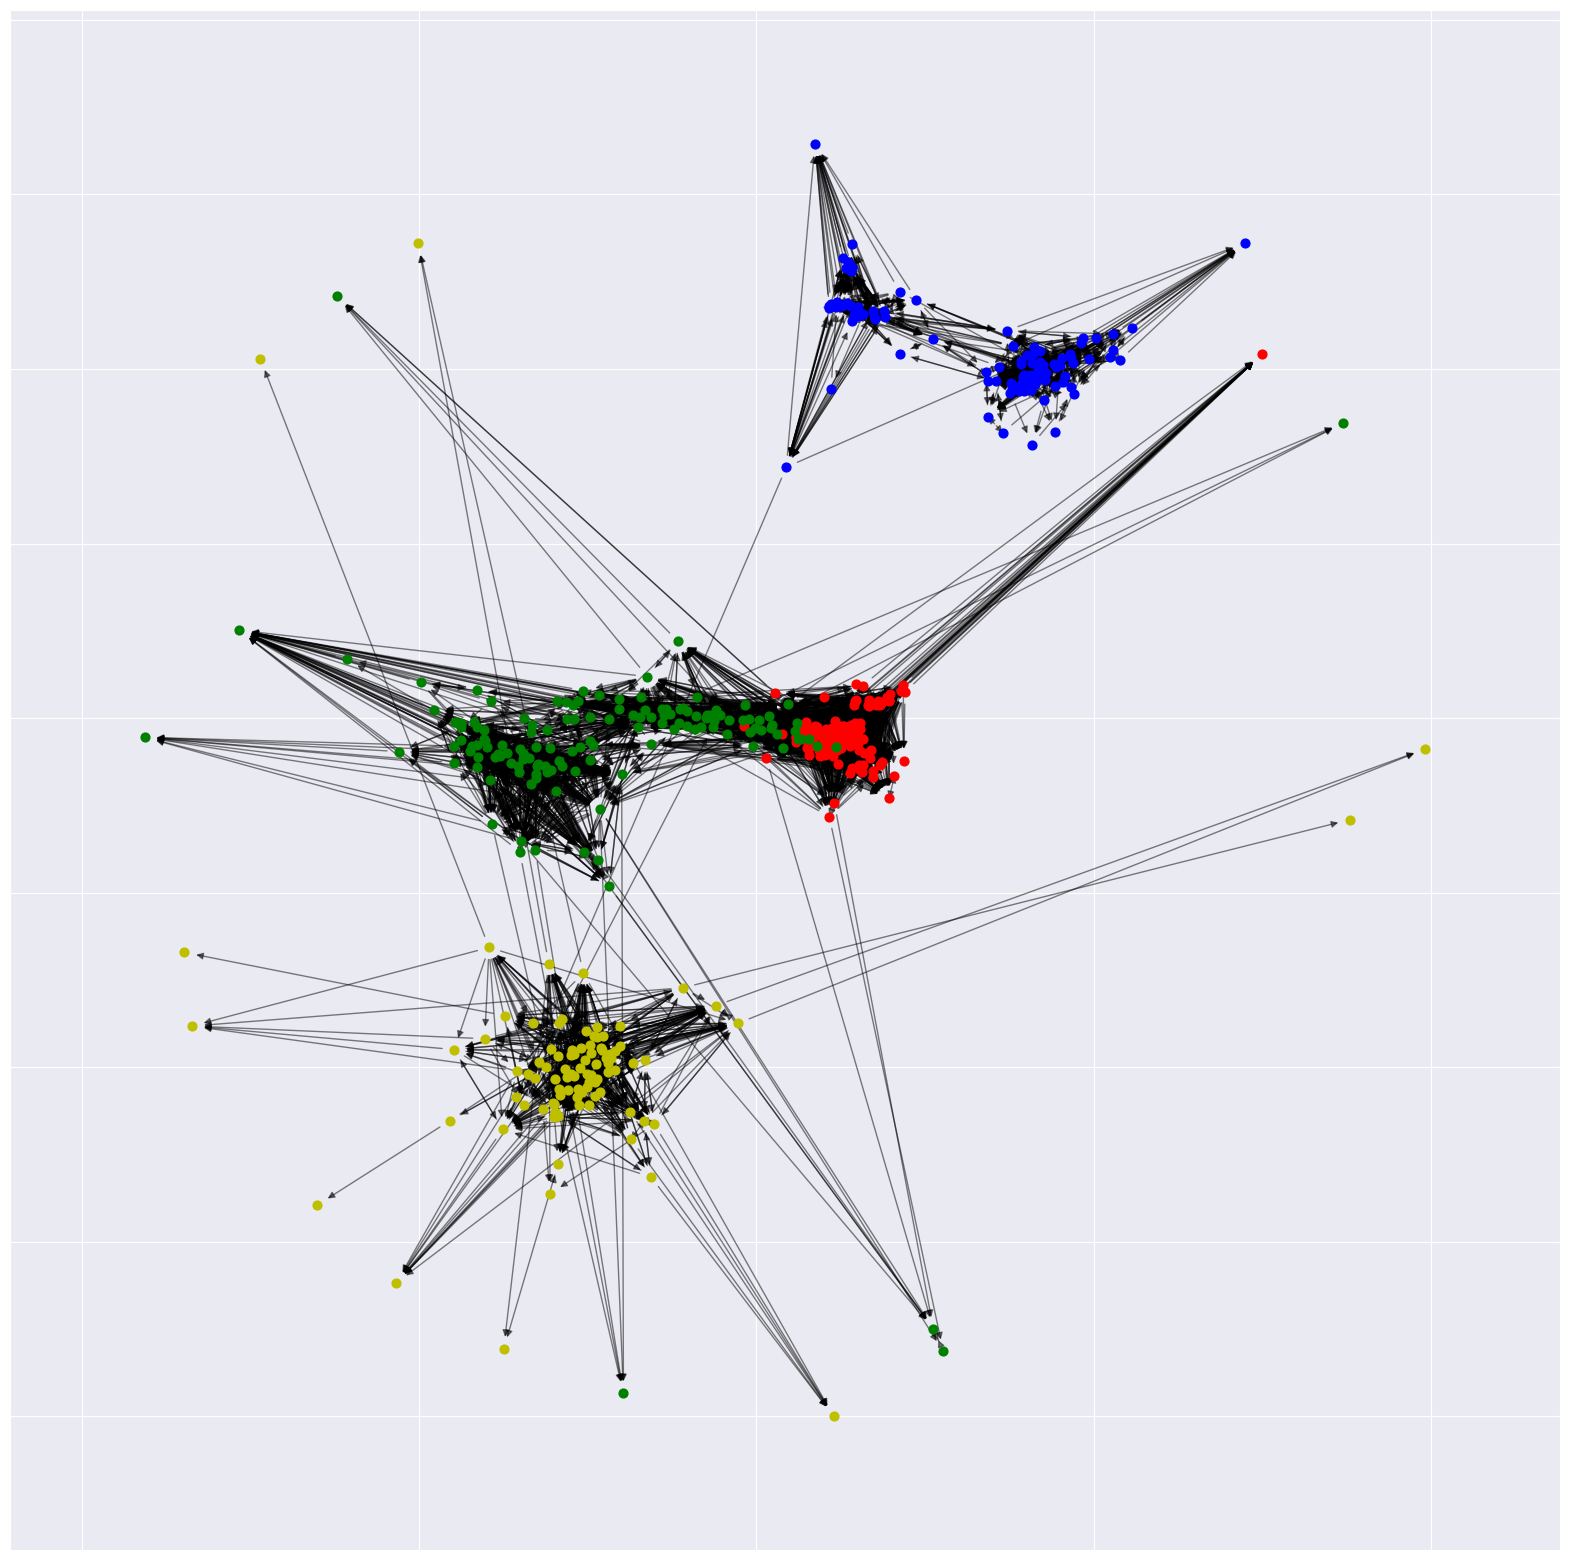

In [71]:
# draw communities
plt.figure(figsize=(20, 20))
pos = nx.spring_layout(subgraph)
colors = ['r', 'g', 'b', 'y', 'm', 'c', 'k', 'w']
for i, c in enumerate(communities):
    nx.draw_networkx_nodes(subgraph, pos, c, node_size=40, node_color=colors[i])
nx.draw_networkx_edges(subgraph, pos, alpha=0.5)
plt.show()


In [80]:
modularity_dict = {}
for i,c in enumerate(communities):
    for name in c:
        modularity_dict[name] = i

nx.set_node_attributes(subgraph, modularity_dict, 'modularity')

In [81]:
# get all the classes of nodes
node_classes = set(nx.get_node_attributes(subgraph, 'modularity').values())
print(node_classes)

{0, 1, 2, 3}


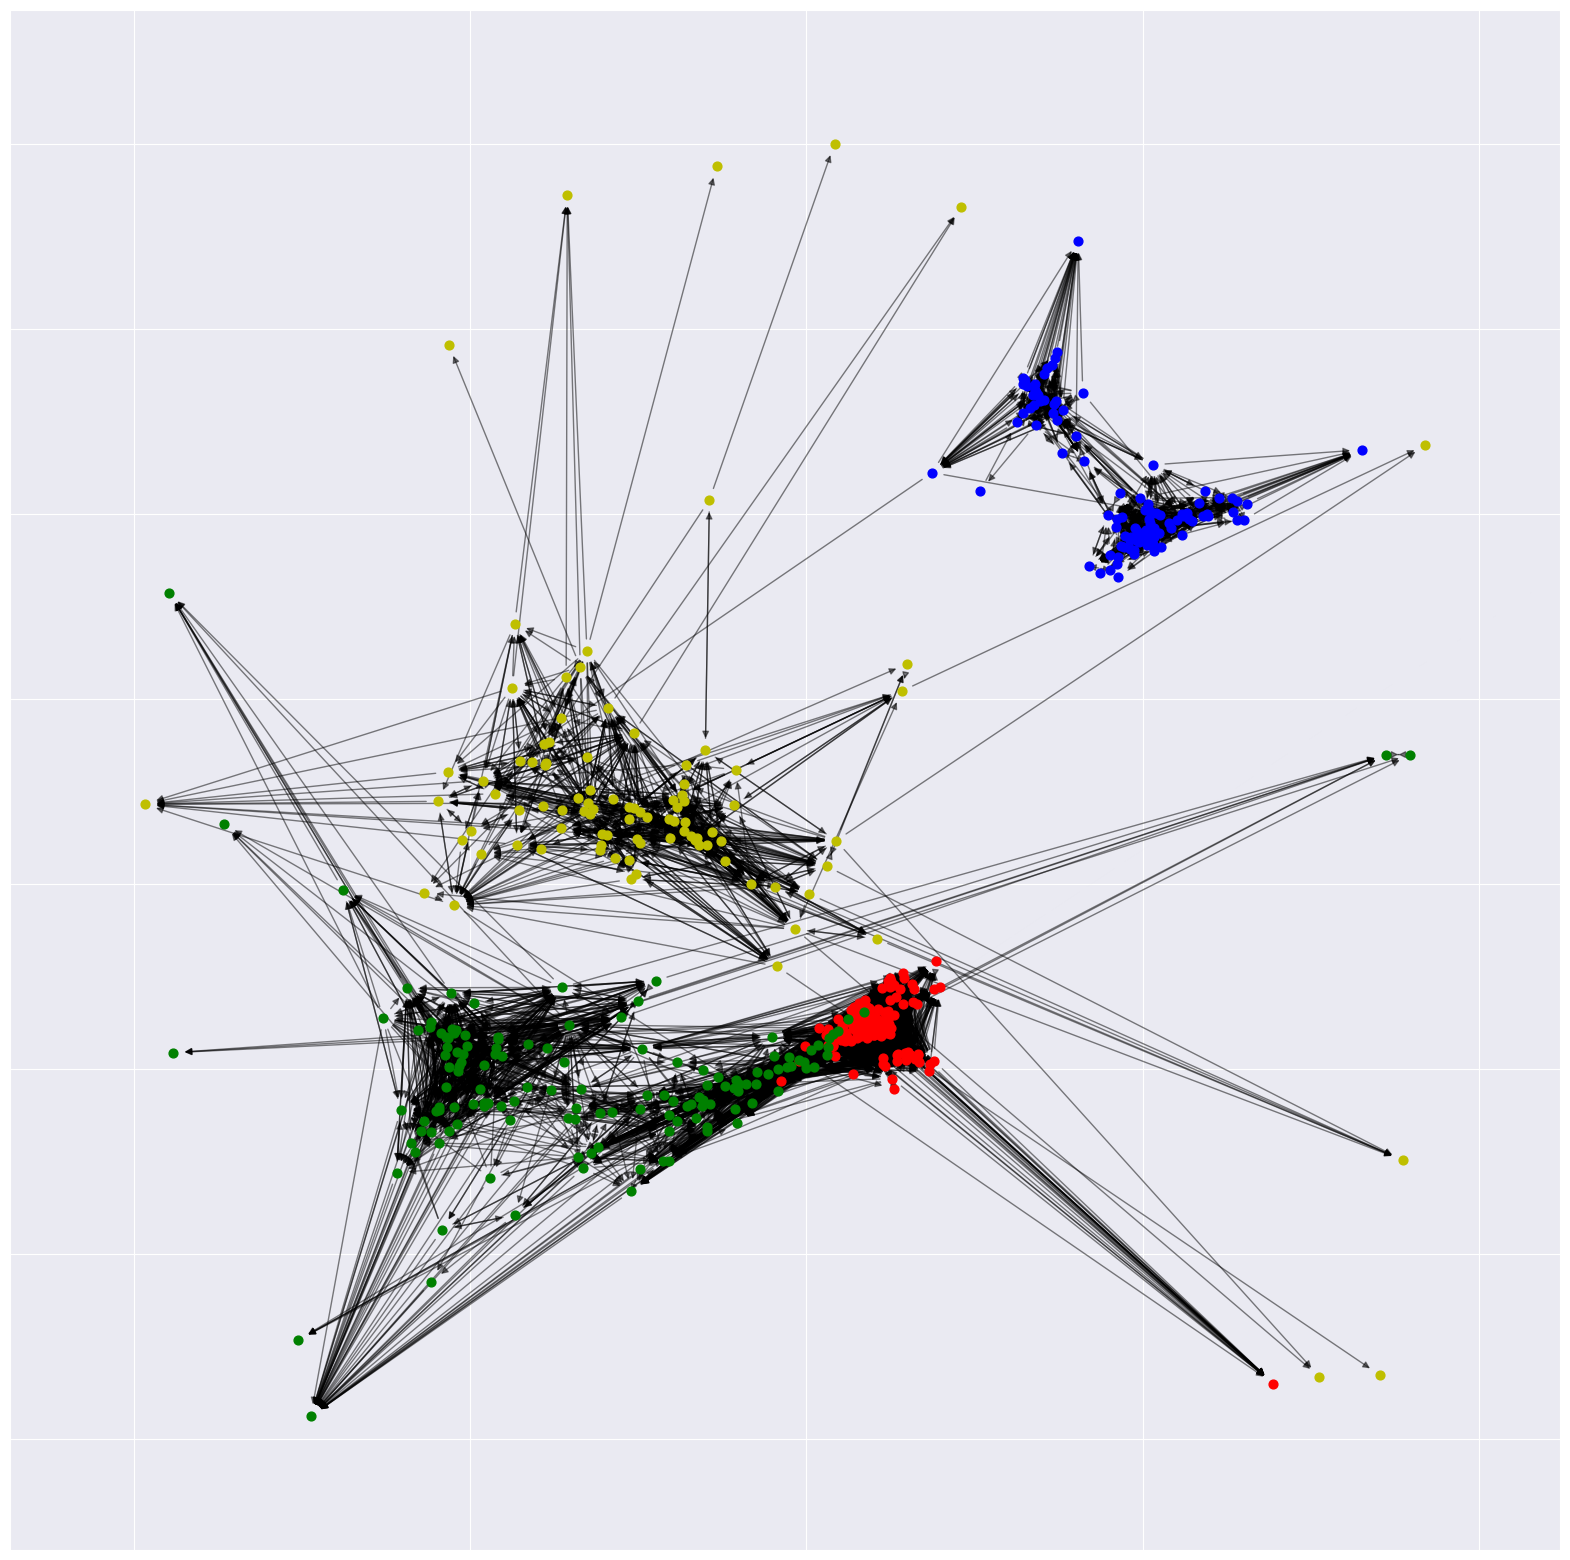

In [83]:
# draw nodes and edges separately to allow for edge customisation
plt.figure(figsize=(20, 20))
pos = nx.spring_layout(subgraph)
for i, c in enumerate(node_classes):
    nx.draw_networkx_nodes(subgraph, pos, [n for n in subgraph.nodes() if subgraph.nodes[n]['modularity'] == c],
                           node_size=40, node_color=colors[i])
nx.draw_networkx_edges(subgraph, pos, alpha=0.5)
plt.show()

In [84]:
for i, c in enumerate(communities):
    print(f"Class {i}: {list(c)}")

Class 0: [222261763, 88097807, 37270037, 229425177, 69592091, 460282402, 17116707, 231238695, 461410856, 117901353, 6581292, 221036078, 8088112, 153460275, 276706356, 214328887, 18951737, 31246395, 29911100, 109740608, 206923844, 26929220, 153226312, 312284236, 197504076, 166214735, 220368467, 451250774, 250340951, 116036694, 157829215, 262802533, 72818790, 273149543, 279787626, 189875309, 437804658, 260769396, 276308596, 17868918, 172883064, 200559228, 196327549, 37699718, 103598216, 333161611, 430313102, 134940306, 236184723, 248883350, 170460311, 187773078, 394263193, 160237722, 94621855, 195475105, 123371682, 86221475, 18996905, 220068522, 375228586, 324201646, 113058991, 133055665, 131613362, 262340283, 124528830, 375317198, 107830991, 413275344, 19493072, 88323281, 145845459, 252770012, 529007327, 21548772, 107511013, 22462180, 151338729, 149538028, 213777144, 280935165, 15023872, 56860418, 276577539, 430268163, 203338499, 364971269, 46209291, 358775055, 258140947, 400689940, 678

In [85]:
# get the number of nodes in each class
class_counts = {}
for i, c in enumerate(communities):
    class_counts[i] = len(c)
print(class_counts)

{0: 160, 1: 141, 2: 104, 3: 95}


In [88]:
# get the number of edges within each class
within_class_edges = {}
for i, c in enumerate(communities):
    within_class_edges[i] = subgraph.subgraph(c).number_of_edges()
print(within_class_edges)

{0: 7252, 1: 1775, 2: 1344, 3: 951}


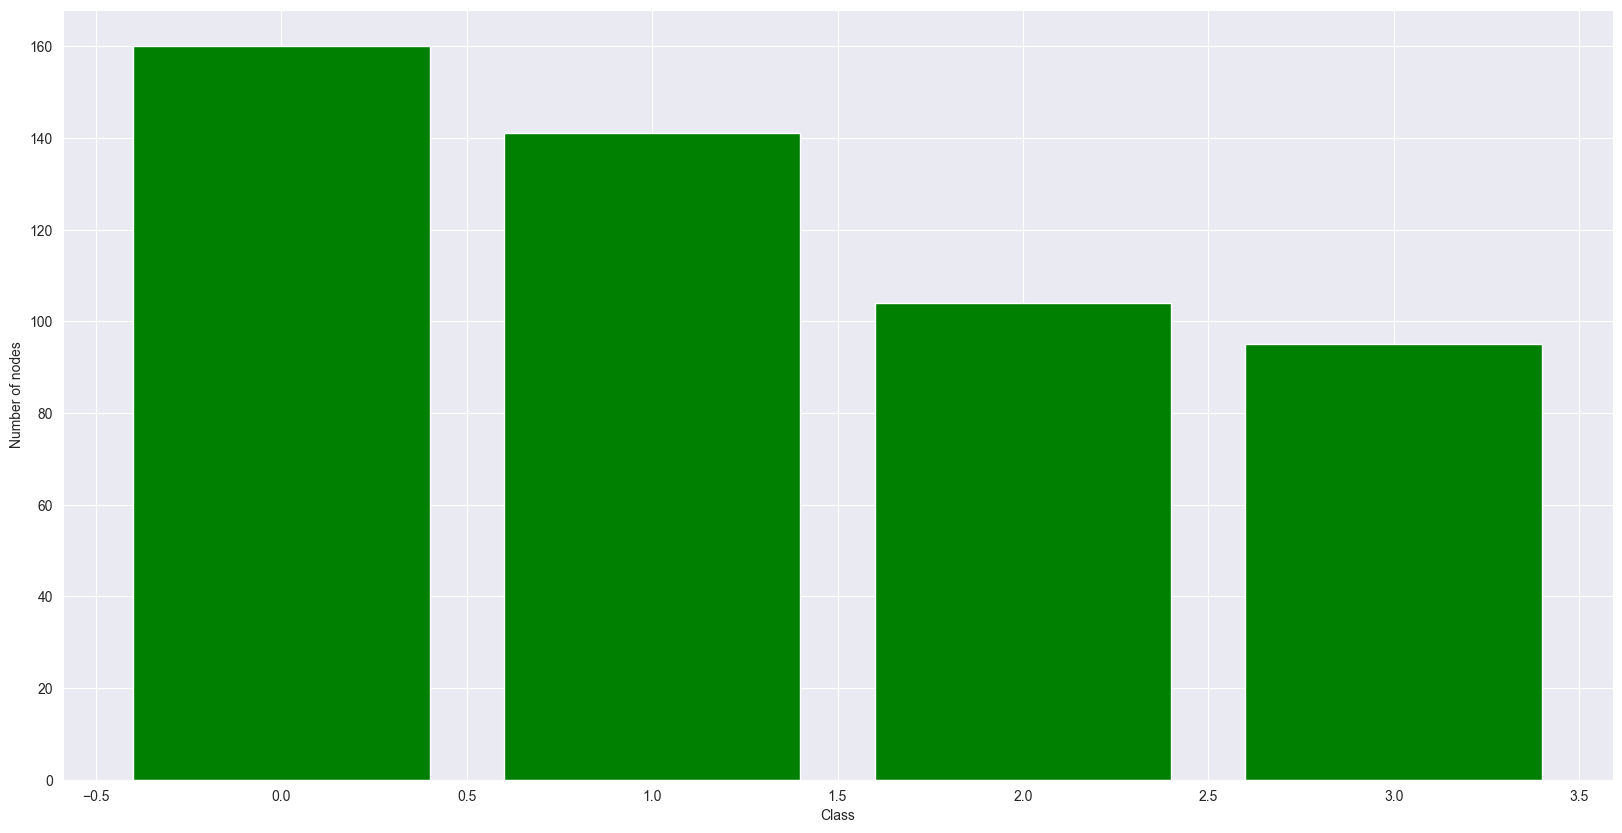

In [90]:
# plot the attributes of each class
plt.figure(figsize=(20, 10))
plt.bar(class_counts.keys(), class_counts.values(), color='g')
plt.xlabel('Class')
plt.ylabel('Number of nodes')
plt.show()

In [94]:
subgraph.nodes[213777144]

{'betweenness': 0.000253977982514691,
 'closeness': 0.2231402375901901,
 'eigenvector': 0.018388646179029345,
 'pagerank': 0.0006908285674770388,
 'clustering': 0.428169014084507,
 'modularity': 0}

In [95]:
# sort nodes based on eigenvector centrality via subgraph variable
sorted_eigenvector = sorted(subgraph.nodes(data=True), key=lambda x: x[1]['eigenvector'], reverse=True)
print(sorted_eigenvector)

[(40981798, {'betweenness': 0.03698428422124765, 'closeness': 0.29655684425846507, 'eigenvector': 0.1871237677170498, 'pagerank': 0.018707491726905508, 'clustering': 0.29985421017376573, 'modularity': 0}), (22462180, {'betweenness': 0.0003057117570098465, 'closeness': 0.254238627171055, 'eigenvector': 0.1822268199691713, 'pagerank': 0.014193012874784177, 'clustering': 0.29717420212765955, 'modularity': 0}), (34428380, {'betweenness': 0.0004938726723043227, 'closeness': 0.2529744572016962, 'eigenvector': 0.1808882844583531, 'pagerank': 0.014157706392261566, 'clustering': 0.3005053863545684, 'modularity': 0}), (43003845, {'betweenness': 0.03603140920211562, 'closeness': 0.29521841878470023, 'eigenvector': 0.18033572293785027, 'pagerank': 0.01667443912733366, 'clustering': 0.31307437813993383, 'modularity': 0}), (17868918, {'betweenness': 0.0006702764315596779, 'closeness': 0.2746753254559509, 'eigenvector': 0.15384763565341847, 'pagerank': 0.009840841115043297, 'clustering': 0.4194467046

In [96]:
# filter out the class 0 from sorted_eigenvector
class_0 = [n for n in sorted_eigenvector if n[1]['modularity'] == 0]
print(class_0)

[(40981798, {'betweenness': 0.03698428422124765, 'closeness': 0.29655684425846507, 'eigenvector': 0.1871237677170498, 'pagerank': 0.018707491726905508, 'clustering': 0.29985421017376573, 'modularity': 0}), (22462180, {'betweenness': 0.0003057117570098465, 'closeness': 0.254238627171055, 'eigenvector': 0.1822268199691713, 'pagerank': 0.014193012874784177, 'clustering': 0.29717420212765955, 'modularity': 0}), (34428380, {'betweenness': 0.0004938726723043227, 'closeness': 0.2529744572016962, 'eigenvector': 0.1808882844583531, 'pagerank': 0.014157706392261566, 'clustering': 0.3005053863545684, 'modularity': 0}), (43003845, {'betweenness': 0.03603140920211562, 'closeness': 0.29521841878470023, 'eigenvector': 0.18033572293785027, 'pagerank': 0.01667443912733366, 'clustering': 0.31307437813993383, 'modularity': 0}), (17868918, {'betweenness': 0.0006702764315596779, 'closeness': 0.2746753254559509, 'eigenvector': 0.15384763565341847, 'pagerank': 0.009840841115043297, 'clustering': 0.4194467046

In [99]:
# show class_0 as table, each attribute in a column
class_0_df = pd.DataFrame(class_0)
class_0_df.columns = ['node', 'attributes']
class_0_df = pd.concat([class_0_df.drop(['attributes'], axis=1), class_0_df['attributes'].apply(pd.Series)], axis=1)
class_0_df

,node,betweenness,closeness,eigenvector,pagerank,clustering,modularity
0,40981798,3.698428e-02,0.296557,0.187124,0.018707,0.299854,0.0
1,22462180,3.057118e-04,0.254239,0.182227,0.014193,0.297174,0.0
2,34428380,4.938727e-04,0.252974,0.180888,0.014158,0.300505,0.0
3,43003845,3.603141e-02,0.295218,0.180336,0.016674,0.313074,0.0
4,17868918,6.702764e-04,0.274675,0.153848,0.009841,0.419447,0.0
...,...,...,...,...,...,...,...
155,312284236,2.700247e-05,0.202424,0.004607,0.000441,0.542895,0.0
156,413275344,2.672373e-05,0.202335,0.003895,0.000454,0.432234,0.0
157,31246395,7.740581e-07,0.202156,0.003733,0.000388,0.592437,0.0
158,375228586,3.658284e-07,0.201978,0.003123,0.000385,0.600000,0.0


In [100]:
# do the same thing for class1
class_1 = [n for n in sorted_eigenvector if n[1]['modularity'] == 1]
class_1_df = pd.DataFrame(class_1)
class_1_df.columns = ['node', 'attributes']
class_1_df = pd.concat([class_1_df.drop(['attributes'], axis=1), class_1_df['attributes'].apply(pd.Series)], axis=1)
class_1_df

,node,betweenness,closeness,eigenvector,pagerank,clustering,modularity
0,100318079,0.138364,0.255231,0.149430,0.007041,0.189918,1.0
1,2367911,0.236012,0.302833,0.085597,0.008080,0.273779,1.0
2,70492333,0.011952,0.234812,0.040059,0.001497,0.300317,1.0
3,226629405,0.001229,0.229286,0.033902,0.001526,0.382373,1.0
4,27077521,0.000338,0.229286,0.033009,0.001579,0.415155,1.0
...,...,...,...,...,...,...,...
136,111990504,0.000051,0.174100,0.000090,0.000519,0.367647,1.0
137,222802532,0.000083,0.174100,0.000087,0.000444,0.291667,1.0
138,240944206,0.000015,0.178165,0.000087,0.000528,0.491071,1.0
139,126470482,0.000000,0.173970,0.000079,0.000424,0.500000,1.0


In [101]:
# do the same thing for class2
class_2 = [n for n in sorted_eigenvector if n[1]['modularity'] == 2]
class_2_df = pd.DataFrame(class_2)
class_2_df.columns = ['node', 'attributes']
class_2_df = pd.concat([class_2_df.drop(['attributes'], axis=1), class_2_df['attributes'].apply(pd.Series)], axis=1)
class_2_df

,node,betweenness,closeness,eigenvector,pagerank,clustering,modularity
0,16038438,0.027177,0.098283,1.585597e-06,0.005757,0.213195,2.0
1,21158690,0.017082,0.119549,1.527185e-06,0.006727,0.274260,2.0
2,62050341,0.005593,0.095083,1.464750e-06,0.003558,0.461563,2.0
3,7861312,0.000825,0.110502,1.447857e-06,0.006154,0.248141,2.0
4,20747847,0.013252,0.114848,1.422320e-06,0.005291,0.315638,2.0
...,...,...,...,...,...,...,...
99,23152989,0.001538,0.072236,4.859359e-08,0.000911,0.531250,2.0
100,7384432,0.000007,0.062136,4.317358e-08,0.000455,0.225000,2.0
101,263907906,0.000021,0.062901,3.618628e-08,0.000662,0.625000,2.0
102,345707398,0.000000,0.054225,8.061618e-09,0.000462,1.000000,2.0


In [102]:
# do the same thing for class3
class_3 = [n for n in sorted_eigenvector if n[1]['modularity'] == 3]
class_3_df = pd.DataFrame(class_3)
class_3_df.columns = ['node', 'attributes']
class_3_df = pd.concat([class_3_df.drop(['attributes'], axis=1), class_3_df['attributes'].apply(pd.Series)], axis=1)
class_3_df

,node,betweenness,closeness,eigenvector,pagerank,clustering,modularity
0,9973842,2.018879e-02,0.104100,5.109073e-07,0.005443,0.299689,3.0
1,83876527,7.245709e-03,0.091225,4.026136e-07,0.004277,0.290014,3.0
2,22200888,1.140983e-03,0.087760,3.952792e-07,0.002805,0.414788,3.0
3,17859804,6.726771e-04,0.087318,3.507648e-07,0.002617,0.471724,3.0
4,17870886,9.853572e-03,0.087208,3.462579e-07,0.002826,0.383082,3.0
...,...,...,...,...,...,...,...
90,454423088,0.000000e+00,0.062738,4.541578e-09,0.000517,0.000000,3.0
91,19230869,8.048225e-07,0.062069,3.758444e-09,0.000512,0.703704,3.0
92,84111527,6.797204e-06,0.062686,3.242381e-09,0.000472,0.477273,3.0
93,258681133,0.000000e+00,0.062016,1.753871e-09,0.000379,0.000000,3.0
